In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import xarray as xr

In [2]:
#import cartopy.crs as ccrs

In [3]:
# Open the netCDF 
dset = xr.open_dataset('/Users/mendezjf/Downloads/Geo_modeling/Course_Data/Climate_Model_Data/tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_195001-201412.nc')

In [4]:
# To include a breakpoint
#pdb.set_trace()

# Exploring the data structure

In [5]:
# To get information about the file
dset

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 288, time: 780)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    height     float64 ...
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * time       (time) object 1950-01-16 12:00:00 ... 2014-12-16 12:00:00
Data variables:
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               Amon
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/a54fe2f4-0a68-4420-8702-36750bde9b05
    variable_id:            tas
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [6]:
# To get information about the variables
dset.variables.keys()

KeysView(Frozen({'bnds': <xarray.IndexVariable 'bnds' (bnds: 2)>
array([1., 2.])
Attributes:
    long_name:  vertex number, 'height': <xarray.Variable ()>
[1 values with dtype=float64]
Attributes:
    long_name:      height
    units:          m
    cell_methods:   time: point
    axis:           Z
    positive:       up
    standard_name:  height
    description:    ~2 m standard surface air temperature and surface humidit..., 'lat': <xarray.IndexVariable 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22

In [7]:
# To get information about the dimensions
dset.dims

Frozen({'bnds': 2, 'lat': 180, 'lon': 288, 'time': 780})

In [8]:
# To get information about the variables
dset.data_vars

Data variables:
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...

In [9]:
# To get information about each each dimension
dset.coords

Coordinates:
  * bnds     (bnds) float64 1.0 2.0
    height   float64 ...
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * time     (time) object 1950-01-16 12:00:00 ... 2014-12-16 12:00:00

In [10]:
# Analyze the spatial resolution
print(0.625 - 1.875)
print(358.1 - 359.4)

-1.25
-1.2999999999999545


In [11]:
# Analyze the spatial resolution
print(f'dset considers {dset.time[0].item() }, {dset.time[1].item() }, {dset.time[2].item()}, , {dset.time[3].item()} ')

dset considers 1950-01-16 12:00:00, 1950-02-15 00:00:00, 1950-03-16 12:00:00, , 1950-04-16 00:00:00 


In [12]:
# Model resolution
dset.grid

'atmos data regridded from Cubed-sphere (c96) to 180,288; interpolation method: conserve_order2'

In [13]:
# Analyze the temporal resolution
dset.time.var

<bound method DataArrayAggregations.var of <xarray.DataArray 'time' (time: 780)>
array([cftime.DatetimeNoLeap(1950, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1950, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
    height   float64 ...
  * time     (time) object 1950-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  noleap
    bounds:         time_bnds
    standard_name:  time
    description:    Temporal mean>

# Attributes: Metadata about your data

In [14]:
# To get information about the attributes
dset.attrs

{'external_variables': 'areacella',
 'history': 'File was processed by fremetar (GFDL analog of CMOR). TripleID: [exper_id_MFLg3OOf97,realiz_id_6UiFuoEKMa,run_id_eWiWnwFCM2]',
 'table_id': 'Amon',
 'activity_id': 'CMIP',
 'branch_method': 'standard',
 'branch_time_in_child': 0.0,
 'branch_time_in_parent': 36500.0,
 'comment': '<null ref>',
 'contact': 'gfdl.climate.model.info@noaa.gov',
 'Conventions': 'CF-1.7 CMIP-6.0 UGRID-1.0',
 'creation_date': '2019-07-26T23:14:19Z',
 'data_specs_version': '01.00.27',
 'experiment': 'all-forcing simulation of the recent past',
 'experiment_id': 'historical',
 'forcing_index': 1,
 'frequency': 'mon',
 'further_info_url': 'https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.GFDL-ESM4.historical.none.r1i1p1f1',
 'grid': 'atmos data regridded from Cubed-sphere (c96) to 180,288; interpolation method: conserve_order2',
 'grid_label': 'gr1',
 'initialization_index': 1,
 'institution': 'National Oceanic and Atmospheric Administration, Geophysical Fluid Dynamic

In [15]:
# Get information about the variable: air temperature (tas)
dset.tas

<xarray.DataArray 'tas' (time: 780, lat: 180, lon: 288)>
[40435200 values with dtype=float32]
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * time     (time) object 1950-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  air_temperature
    interp_method:  conserve_order2
    original_name:  tas

In [16]:
# Get information about the units of our variable: air temperature (tas)
dset.tas.units

'K'

In [17]:
# To get the min and maximum value associated with the temperature
dset.tas.min(), dset.tas.max() 

(<xarray.DataArray 'tas' ()>
 array(198.49478149)
 Coordinates:
     height   float64 ...,
 <xarray.DataArray 'tas' ()>
 array(316.25610352)
 Coordinates:
     height   float64 ...)

In [18]:
#Get the information about the dimensions of the air temperature
dset.tas.shape

(780, 180, 288)

In [19]:
# Get information about the dimensions of the air temperature (details)
dset.tas.variable

<xarray.Variable (time: 780, lat: 180, lon: 288)>
array([[[236.77103, 236.7474 , ..., 236.81824, 236.79463],
        [238.07489, 238.02008, ..., 238.18417, 238.1296 ],
        ...,
        [246.17122, 246.18727, ..., 246.139  , 246.15512],
        [246.2863 , 246.29243, ..., 246.27406, 246.28018]],

       [[230.55759, 230.52547, ..., 230.62186, 230.58972],
        [232.2602 , 232.21432, ..., 232.35098, 232.30574],
        ...,
        [239.28232, 239.2915 , ..., 239.26408, 239.27318],
        [239.29973, 239.30472, ..., 239.28975, 239.29474]],

       ...,

       [[237.9367 , 237.90562, ..., 237.99887, 237.96779],
        [239.5269 , 239.45195, ..., 239.6766 , 239.60179],
        ...,
        [247.16019, 247.15692, ..., 247.16644, 247.16336],
        [246.78036, 246.77466, ..., 246.79178, 246.78607]],

       [[239.37491, 239.3524 , ..., 239.4199 , 239.39742],
        [240.10254, 240.04181, ..., 240.2239 , 240.16324],
        ...,
        [240.57942, 240.60406, ..., 240.53026, 240.55482],
        [240.71489, 240.72598, ..., 240.6927 , 240.7038 ]]], dtype=float32)
Attributes:
    long_name:      Near-Surface Air Temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    standard_name:  air_temperature
    interp_method:  conserve_order2
    original_name:  tas

In [20]:
# To get the total average over all the dimensions
# Using .item() to get only the value

print(f'The minimum registered temperature was: {dset.tas.min().item()}')
print(f'The average of registered temperature was: {dset.tas.mean().item()}')
print(f'The maximum registered temperature was: {dset.tas.max().item()}')


The minimum registered temperature was: 198.49478149414062
The average of registered temperature was: 277.62847900390625
The maximum registered temperature was: 316.256103515625


In [21]:
# Compute the average over the time dimension.
# So the dimension time will disappear and we are going to keep the rest (lat, lon)
dset.tas.mean(dim='time')

<xarray.DataArray 'tas' (lat: 180, lon: 288)>
array([[223.38849, 223.35884, 223.32916, ..., 223.47725, 223.44783,
        223.41797],
       [224.45287, 224.38654, 224.3198 , ..., 224.65154, 224.5854 ,
        224.51926],
       [225.67291, 225.56787, 225.46274, ..., 225.9877 , 225.88292,
        225.77794],
       ...,
       [255.39357, 255.41643, 255.43889, ..., 255.32492, 255.34805,
        255.37103],
       [255.19441, 255.2055 , 255.21678, ..., 255.16002, 255.17139,
        255.18285],
       [255.02461, 255.02652, 255.02861, ..., 255.0182 , 255.02031,
        255.0224 ]], dtype=float32)
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4

In [22]:
#import cartopy.crs as ccrs
# Define the map projection (how does the map look like)
#ax = plt.axes(projection=ccrs.EqualEarth())
# ax is an empty plot. We now plot the variable sw_avg onto ax
#dset.tas.mean(dim='month').plot(ax=ax, transform=ccrs.PlateCarree()) 
# the keyword "transform" tells the function in which projection the data is stored 
#ax.coastlines(); ax.gridlines(); # Add gridlines and coastlines to the plot

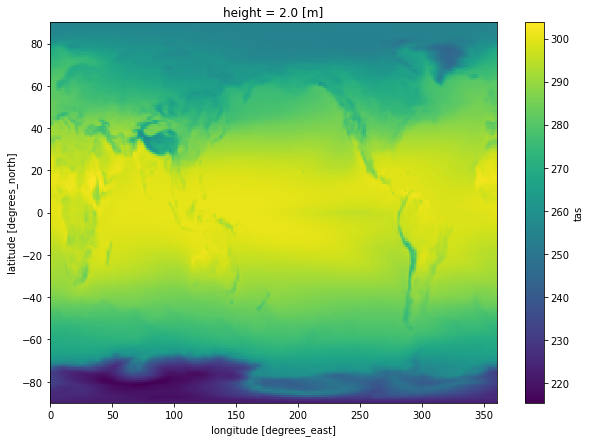

In [23]:
plt.figure(figsize=(10,7))
dset.tas.mean(dim='time').plot()

In [24]:
# Compute the average over the long dimension.
# So the dimension long will disappear and we are going to keep the rest (time, lat)
dset.tas.mean(dim='lon')

<xarray.DataArray 'tas' (time: 780, lat: 180)>
array([[236.25366, 237.2793 , 239.00618, ..., 245.29834, 245.86827,
        246.51898],
       [229.20337, 230.27045, 232.37608, ..., 239.80008, 239.61073,
        239.35951],
       [222.21295, 223.89288, 226.39543, ..., 243.68915, 244.13818,
        244.34402],
       ...,
       [222.881  , 223.91986, 225.90167, ..., 253.34392, 253.21227,
        253.14725],
       [237.10533, 237.82707, 239.27605, ..., 247.20941, 246.76091,
        246.51964],
       [239.34332, 240.10764, 241.56323, ..., 241.30922, 241.088  ,
        240.92169]], dtype=float32)
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) object 1950-01-16 12:00:00 ... 2014-12-16 12:00:00

In [25]:
# Compute the average over the long dimension and time dimension.
# So the dimension long and time will disappear and we are going to keep the rest (lat)
dset.tas.mean(dim='time').mean(dim='lon')

<xarray.DataArray 'tas' (lat: 180)>
array([223.0157 , 224.31166, 226.54123, 229.49289, 232.49756, 234.37402,
       234.92152, 235.08209, 235.00562, 234.8349 , 234.93112, 235.57112,
       237.4327 , 239.46056, 241.61952, 243.6409 , 245.87497, 248.55151,
       251.40924, 254.0523 , 256.80945, 259.74875, 262.74463, 265.21878,
       266.88013, 268.18317, 269.47125, 270.59302, 271.54944, 272.3693 ,
       273.11102, 273.84256, 274.55804, 275.25867, 275.92285, 276.49435,
       277.0814 , 277.69272, 278.3004 , 278.91275, 279.56577, 280.25504,
       280.96017, 281.67514, 282.38275, 283.08398, 283.787  , 284.4452 ,
       285.1134 , 285.87054, 286.55295, 287.16632, 287.72635, 288.30573,
       288.9014 , 289.45438, 289.93518, 290.44727, 290.97232, 291.52716,
       292.05893, 292.52887, 292.98334, 293.42242, 293.9015 , 294.34167,
       294.7352 , 295.0675 , 295.40707, 295.7039 , 295.9491 , 296.2104 ,
       296.46442, 296.7474 , 296.92627, 297.08365, 297.37457, 297.7069 ,
       297.95047, 298.12607, 298.3053 , 298.42133, 298.54916, 298.63315,
       298.7187 , 298.7405 , 298.65982, 298.66028, 298.57086, 298.54614,
       298.59515, 298.82086, 299.03967, 299.17905, 299.21005, 299.22818,
       299.21875, 299.24567, 299.28494, 299.29846, 299.32037, 299.36893,
       299.35367, 299.26443, 299.0409 , 298.86154, 298.6326 , 298.36462,
       298.06607, 297.68176, 297.34457, 297.00504, 296.52203, 296.0193 ,
       295.58508, 295.17148, 294.6115 , 293.67447, 292.45682, 291.43793,
       290.5589 , 289.77887, 288.93207, 287.88635, 287.01428, 286.19922,
       286.03876, 285.87228, 285.38   , 285.0172 , 284.44254, 283.5497 ,
       282.6808 , 282.16104, 281.5955 , 280.81335, 279.898  , 279.14163,
       278.38785, 277.74377, 277.12558, 276.5877 , 276.1904 , 275.76614,
       275.32474, 274.8194 , 274.28445, 273.818  , 273.35107, 272.61642,
       271.53796, 270.47955, 269.65427, 268.8478 , 267.94928, 267.1605 ,
       266.36615, 265.4607 , 264.64542, 263.8982 , 263.24768, 262.4345 ,
       261.67734, 260.93994, 260.21832, 259.42224, 258.7333 , 257.83426,
       257.09857, 256.72617, 256.4177 , 256.0286 , 255.84016, 255.7232 ,
       255.48462, 255.28508, 255.1429 , 255.03456, 254.97179, 254.918  ],
      dtype=float32)
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

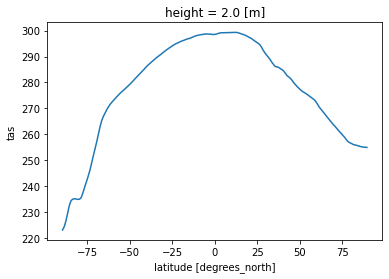

In [26]:
dset.tas.mean(dim='time').mean(dim='lon').plot();

In [27]:
# Same as the previous command
# Compute the average over the long dimension and time dimension.
# So the dimension long and time will disappear and we are going to keep the rest (lat)
dset.tas.mean(dim=['time', 'lon'])

<xarray.DataArray 'tas' (lat: 180)>
array([223.0155 , 224.31166, 226.5413 , 229.49292, 232.49733, 234.37395,
       234.92154, 235.082  , 235.00562, 234.83481, 234.93109, 235.57118,
       237.4328 , 239.46045, 241.61938, 243.64091, 245.87512, 248.55151,
       251.4092 , 254.05219, 256.8094 , 259.74896, 262.7445 , 265.2187 ,
       266.88016, 268.18304, 269.47116, 270.5931 , 271.54947, 272.36923,
       273.11102, 273.84256, 274.55807, 275.25873, 275.92282, 276.49448,
       277.0815 , 277.6928 , 278.30032, 278.91275, 279.56573, 280.2549 ,
       280.96014, 281.6752 , 282.38275, 283.08408, 283.78687, 284.44522,
       285.11325, 285.87033, 286.55295, 287.16626, 287.72626, 288.3059 ,
       288.90143, 289.4543 , 289.93518, 290.4474 , 290.9722 , 291.52722,
       292.0589 , 292.5289 , 292.98343, 293.42252, 293.90152, 294.3418 ,
       294.7352 , 295.0675 , 295.40704, 295.70392, 295.94916, 296.21024,
       296.46445, 296.74728, 296.92615, 297.08377, 297.37448, 297.70697,
       297.95078, 298.126  , 298.30518, 298.42148, 298.54895, 298.63324,
       298.7186 , 298.7406 , 298.6596 , 298.6603 , 298.5707 , 298.5459 ,
       298.59494, 298.82086, 299.03955, 299.17914, 299.21005, 299.22824,
       299.21872, 299.2455 , 299.2849 , 299.29846, 299.32047, 299.36896,
       299.35364, 299.2645 , 299.04105, 298.86163, 298.63278, 298.3646 ,
       298.06598, 297.68182, 297.34454, 297.0051 , 296.52216, 296.01913,
       295.58493, 295.17166, 294.61142, 293.6746 , 292.45688, 291.43793,
       290.55875, 289.7789 , 288.932  , 287.88635, 287.01443, 286.1992 ,
       286.0389 , 285.87228, 285.3802 , 285.01715, 284.4426 , 283.54956,
       282.68076, 282.16086, 281.59567, 280.8134 , 279.89816, 279.14142,
       278.38788, 277.74368, 277.12558, 276.58765, 276.1904 , 275.76617,
       275.3248 , 274.81946, 274.28442, 273.81815, 273.35104, 272.61652,
       271.5378 , 270.47964, 269.65417, 268.84805, 267.9492 , 267.16055,
       266.3661 , 265.46088, 264.64536, 263.8982 , 263.24762, 262.4346 ,
       261.67722, 260.9401 , 260.21823, 259.4222 , 258.73334, 257.8343 ,
       257.09863, 256.72626, 256.41748, 256.02853, 255.84013, 255.7232 ,
       255.48456, 255.28528, 255.14288, 255.03459, 254.97173, 254.91808],
      dtype=float32)
Coordinates:
    height   float64 ...
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [28]:
# Selecting the variable temperature
Temperature = np.array(dset.variables['tas'])

In [29]:
# Checking the dimensions of the variable
#dset.lat
# Selecting the first two values related with the selected variables
dset.lat.values[:2], dset.lon.values[:2] 

(array([-89.5, -88.5]), array([0.625, 1.875]))

In [30]:
# time: 0, lat: 0, lon: 0
dset.tas.values[0,0,0 ]

236.77103

In [31]:
#Get the information about the dimensions of the air temperature
#dset['tas'].dtype
dset.tas.dtype

dtype('float32')

In [32]:
# Get information about the time
Time = np.array(dset.variables['time'])

In [33]:
# Get the minimum of time
Time.min()

cftime.DatetimeNoLeap(1950, 1, 16, 12, 0, 0, 0, has_year_zero=True)

In [34]:
# Get the maximum of time
#dset.time.max()
Time.max()

cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)

In [35]:
# Difference between the first data and last data time
Time.max() - Time.min()

datetime.timedelta(days=23694)

In [37]:
# Charging all files
# Open the netCDF 
historical_185001 = xr.open_dataset('/Users/mendezjf/Downloads/Geo_modeling/Course_Data/Climate_Model_Data/tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_185001-194912.nc')
historical_195001 = xr.open_dataset('/Users/mendezjf/Downloads/Geo_modeling/Course_Data/Climate_Model_Data/tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_195001-201412.nc')
historical_ssp119 = xr.open_dataset('/Users/mendezjf/Downloads/Geo_modeling/Course_Data/Climate_Model_Data/tas_Amon_GFDL-ESM4_ssp119_r1i1p1f1_gr1_201501-210012.nc')
historical_ssp245 = xr.open_dataset('/Users/mendezjf/Downloads/Geo_modeling/Course_Data/Climate_Model_Data/tas_Amon_GFDL-ESM4_ssp245_r1i1p1f1_gr1_201501-210012.nc')
historical_ssp585 = xr.open_dataset('/Users/mendezjf/Downloads/Geo_modeling/Course_Data/Climate_Model_Data/tas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_201501-210012.nc')

In [39]:
# Get the time information about each NC file 
print(f'historical_185001 goes from {historical_185001.time.min().item()} to {historical_185001.time.max().item()} ')
print(f'historical_195001 goes from {historical_195001.time.min().item()} to {historical_195001.time.max().item()} ')
print(f'historical_ssp119 goes from {historical_ssp119.time.min().item()} to {historical_ssp119.time.max().item()} ')
print(f'historical_ssp245 goes from {historical_ssp245.time.min().item()} to {historical_ssp245.time.max().item()} ')
print(f'historical_ssp585 goes from {historical_ssp585.time.min().item()} to {historical_ssp585.time.max().item()} ')

historical_185001 goes from 1850-01-16 12:00:00 to 1949-12-16 12:00:00 
historical_195001 goes from 1950-01-16 12:00:00 to 2014-12-16 12:00:00 
historical_ssp119 goes from 2015-01-16 12:00:00 to 2100-12-16 12:00:00 
historical_ssp245 goes from 2015-01-16 12:00:00 to 2100-12-16 12:00:00 
historical_ssp585 goes from 2015-01-16 12:00:00 to 2100-12-16 12:00:00 


In [ ]:
# Calculate the mean for 1850 - 1900
plt.figure(figsize=(10,7))
plot = np.mean(historical_185001['tas'].sel(time=slice('18500101', '19001231')), axis=0).plot()  

# Add color bar with a label
cbar = plt.colorbar(plot)
cbar.set_label('Temperature (K)', fontsize=15)

plt.title('', fontsize = 15)
plt.xlabel('Longitude (degrees)', fontsize = 15)
plt.ylabel('Latitude (degrees)', fontsize = 15)
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.show
#plt.savefig('assignment_2_1850_1900.png', dpi = 300)

In [ ]:
# Calculate the mean for ssp119 (2071 - 2100)
plt.figure(figsize=(10,7))
np.mean(historical_ssp119['tas'].sel(time=slice('20710101', '21001231')), axis=0).plot() 
plt.show
#plt.savefig('assignment_2_ssp119_2071_2100.png', dpi = 300)

In [ ]:
# Calculate the mean for ssp245 (2071 - 2100)
plt.figure(figsize=(10,7))
np.mean(historical_ssp245['tas'].sel(time=slice('20710101', '21001231')), axis=0).plot() 
plt.show
#plt.savefig('assignment_2_ssp245_2071_2100.png', dpi = 300)

In [ ]:
# Calculate the mean for ssp585 (2071 - 2100)
plt.figure(figsize=(10,7))
np.mean(historical_ssp585['tas'].sel(time=slice('20710101', '21001231')), axis=0).plot() 
plt.show
#plt.savefig('assignment_2_ssp585_2071_2100.png', dpi = 300)

<function matplotlib.pyplot.show(close=None, block=None)>

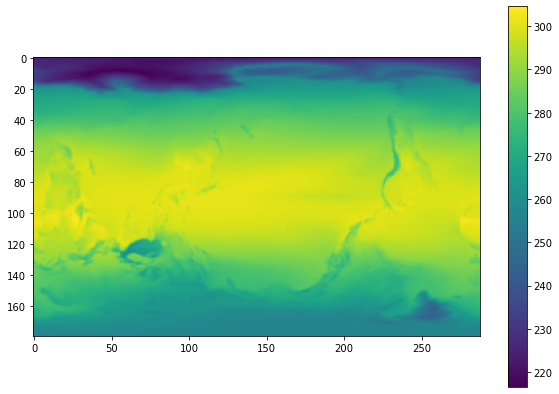

In [38]:
# Calculate the mean - ssp119
plt.figure(figsize=(10,7))
plt.imshow(np.mean(historical_ssp119['tas'].sel(time=slice('20710101', '21001231')), axis=0))
plt.colorbar()
plt.show
#plt.savefig('assignment_2_ssp119_2071_2100.png', dpi = 300)